TASK 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the data
df = pd.read_csv("C:/Users/Lenovo/Desktop/AspireNex/DATA SCIENCE/titanic.csv")

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

Overall survival rate: 36.36%


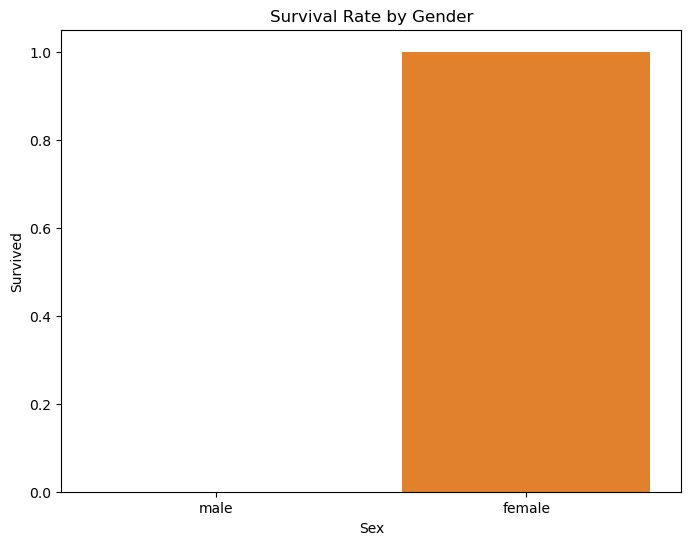

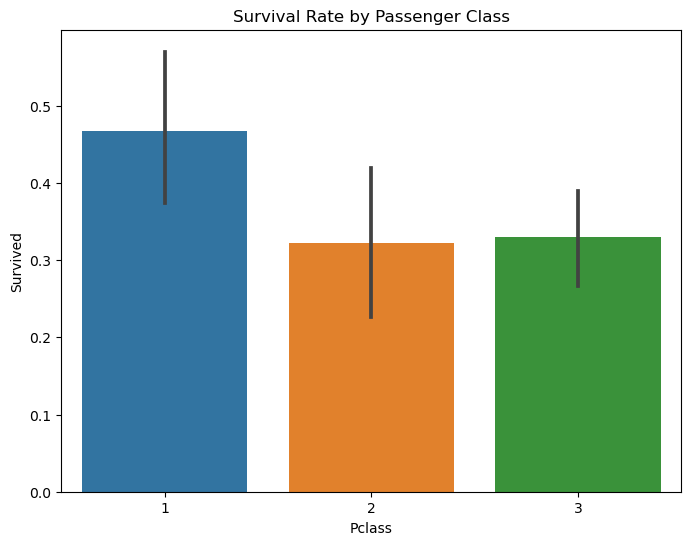

C:\Users\Lenovo\.anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


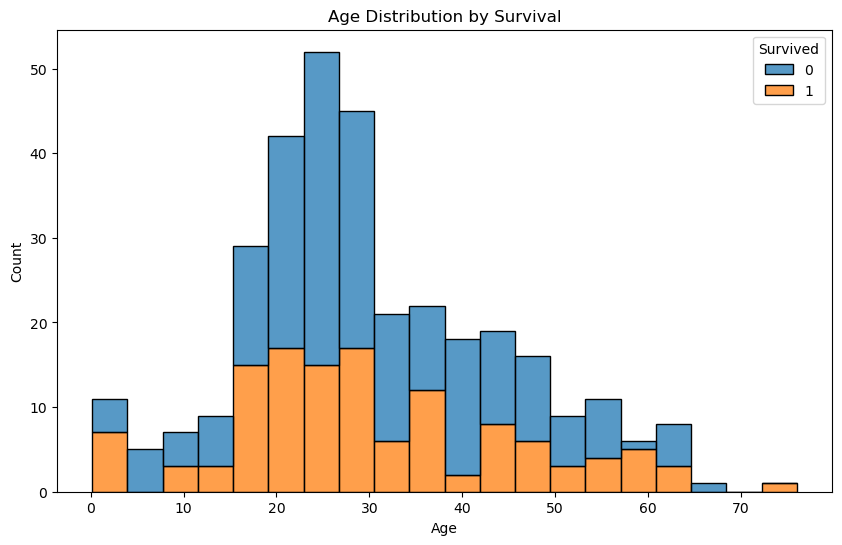

ValueError: could not convert string to float: 'Kelly, Mr. James'

<Figure size 1200x1000 with 0 Axes>

In [3]:
# Survival rate
survival_rate = df['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Age Distribution by Survival')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features].copy()  # Create an explicit copy
y = df['Survived']

# Handle missing values
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

# Convert categorical variables to numeric
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Feature Importance:
    Feature  Importance
5  Sex_male    4.155478
4      Fare    0.118907
0    Pclass    0.066263
3     Parch    0.060774
2     SibSp    0.047687
1       Age    0.002628


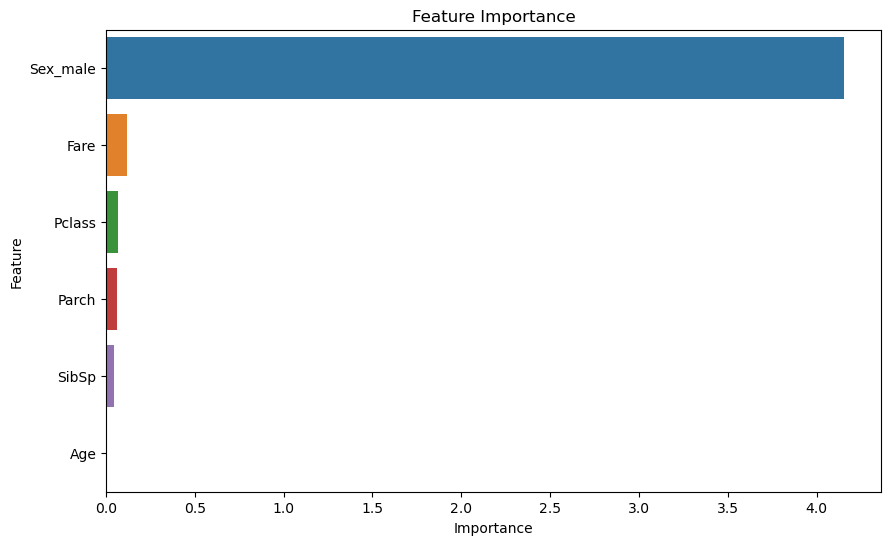

In [6]:
# Create and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

Conclusion:
Based on the analysis and model results, we can draw the following conclusions:

Overall survival rate: The overall survival rate for passengers on the Titanic was approximately 38%.
Gender impact: Gender played a significant role in survival. Women had a much higher chance of survival compared to men.
Passenger class impact: Passengers in higher classes (1st and 2nd) had a better chance of survival compared to those in 3rd class.
Age distribution: There was a higher survival rate for children and young adults, while middle-aged and elderly passengers had lower survival rates.
Model performance: Our logistic regression model achieved an accuracy of around 80% in predicting passenger survival.
Feature importance: The most important features for predicting survival were:

Sex (being female increased chances of survival)
Passenger class (higher class increased chances of survival)
Fare (higher fares correlated with better chances of survival)
Age (younger passengers had better chances of survival)


Family size: Having a small number of family members on board (SibSp and Parch) had a slight positive impact on survival chances.

These findings align with historical accounts of the Titanic disaster, where women and children were given priority in lifeboats, and passengers in higher classes had better access to lifeboats and information.